In [31]:
import pandas as pd
from sklearn.manifold import TSNE as tsne
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import Isomap
from sklearn.decomposition import KernelPCA
from sklearn.manifold import locally_linear_embedding
from sklearn.manifold import MDS
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
import seaborn as sns


In [6]:
df = pd.read_csv('players_preprocessed1.csv')
df.head()

C:\Users\Chakri\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,player_id,player_name,player_firstname,player_lastname,player_age,player_birth_date,player_birth_place,player_birth_country,player_nationality,player_height,...,cards_yellow_90mins,cards_yellowred_90mins,cards_red_90mins,penalty_won_90mins,penalty_commited_90mins,penalty_scored_90mins,penalty_missed_90mins,penalty_saved_90mins,passes_90min_I,saves_90min_I
0,6945,G. Moss,Glen,Moss,37.0,1983-01-19,Hastings,New Zealand,New Zealand,188 cm,...,0.000000,0.000000,0.00000,NaN,NaN,0.0,0.0,0.0,0.148148,3.083884
1,2753,M. Milligan,Mark,Milligan,36.0,1985-08-04,Sydney,Australia,Australia,178 cm,...,0.303030,0.000000,0.00000,NaN,NaN,0.0,0.0,NaN,53.801384,NaN
2,6863,C. Valeri,Carl,Valeri,37.0,1984-08-14,Canberra,Australia,Australia,183 cm,...,0.141232,0.035308,0.00000,NaN,NaN,0.0,0.0,NaN,37.307592,NaN
3,6946,N. Boogaard,Nigel,Boogaard,35.0,1986-08-14,Sydney,Australia,Australia,188 cm,...,0.329843,0.000000,0.04712,NaN,NaN,0.0,0.0,NaN,44.147339,NaN
4,114991,M. Delpierre,Matthieu,Delpierre,40.0,1981-04-26,Nancy,France,France,193 cm,...,0.141844,0.000000,0.00000,NaN,NaN,0.0,0.0,NaN,5.177305,NaN


In [7]:
feature_list = ['games_appearences', 'substitutes_in', 'substitutes_out',
       'substitutes_bench', 'passes_90min_I', 'saves_90min_I',
       'shots_90mins', 'shots_on_90mins', 'goals_total_90mins',
       'goals_conceded_90mins', 'goals_assists_90mins', 'goals_saves_90mins',
       'passes_total_90mins', 'passes_key_90mins', 'passes_accuracy_90mins',
       'tackles_total_90mins', 'tackles_blocks_90mins',
       'tackles_interceptions_90mins', 'duels_total_90mins',
       'duels_won_90mins', 'dribbles_attempts_90mins',
       'dribbles_success_90mins', 'fouls_drawn_90mins',
       'fouls_committed_90mins', 'cards_yellow_90mins',
       'cards_yellowred_90mins', 'cards_red_90mins', 'penalty_won_90mins',
       'penalty_commited_90mins', 'penalty_scored_90mins',
       'penalty_missed_90mins', 'penalty_saved_90mins']


In [8]:
df_sub = df[feature_list]
dfv1 = df_sub.drop(columns=['games_appearences', 'substitutes_in', 'substitutes_out','substitutes_bench'])
dfv1.fillna(value=0,inplace=True)
# Clip values for outliers
uplim = dfv1.quantile(0.995)
for col in dfv1.columns:
    dfv1[col].clip(upper=uplim[col],inplace=True)
dfv1.describe()
df_trans = RobustScaler().fit_transform(dfv1)


In [10]:
pca = PCA(svd_solver='full').fit(df_trans)

In [11]:
exp_var = pca.explained_variance_
print(exp_var)

[6.46893042e+00 3.47698740e+00 2.44146325e+00 1.37475563e+00
 1.27619896e+00 9.73720184e-01 7.93936304e-01 6.85077633e-01
 4.96577056e-01 4.12041054e-01 3.52876119e-01 3.20668596e-01
 2.89695292e-01 2.53459060e-01 2.20317477e-01 8.08572894e-02
 7.36811537e-02 5.93980335e-02 4.36653748e-02 2.08880110e-02
 9.47975750e-03 1.16196008e-03 6.87021059e-04 5.42089365e-04
 4.70237775e-04 4.39582559e-04 3.88260075e-04 1.58500306e-04]


In [13]:
100*np.cumsum(exp_var)/np.sum(exp_var)

array([ 32.13812971,  49.41206296,  61.54143484,  68.37132355,
        74.71157535,  79.54908999,  83.49342487,  86.89694175,
        89.36397367,  91.41102441,  93.16413934,  94.75724489,
        96.19647275,  97.4556763 ,  98.55022999,  98.95193505,
        99.31798852,  99.61308239,  99.83001524,  99.93378844,
        99.98088458,  99.98665729,  99.99007046,  99.9927636 ,
        99.99509977,  99.99728365,  99.99921256, 100.        ])

In [15]:
pca.components_.shape

(28, 28)

In [21]:
pca = PCA(n_components=15,svd_solver='full').fit_transform(df_trans)

In [23]:
pca.shape

(123829, 15)

In [25]:
kmeans = KMeans(n_clusters=6, random_state=0, n_init="auto").fit(pca)


In [26]:
kmeans.cluster_centers_

array([[ 2.01925006e+00, -8.80610245e-01,  4.82195071e-01,
         5.86335634e-01,  4.63864897e-01, -5.80229775e-01,
        -2.83231379e-01, -1.77872277e-01,  4.52444896e-02,
        -2.37097577e-02, -1.63507071e-01, -5.88351534e-03,
        -6.35138660e-02, -7.58987585e-03, -2.39633358e-02],
       [ 1.73772052e+01,  3.92564688e+00, -4.41254320e-01,
         3.86216517e+00, -9.61375946e-01,  2.42891824e+00,
         8.64828782e-01, -2.01936622e-01, -1.18965301e-01,
         7.92009100e-01,  1.08224379e+00, -4.56802366e-02,
         1.92245313e-01,  6.34535974e-03, -1.25798882e-01],
       [ 9.59154513e-01, -1.75503331e+00,  1.22409605e+00,
        -1.11206028e+00, -5.40430199e-01,  5.49905372e-01,
         1.57973297e-01,  1.01594762e-01, -5.31744437e-02,
         8.94181355e-03, -2.95661758e-02,  2.52359856e-02,
         4.53667857e-02, -2.36465669e-02, -2.11648789e-03],
       [ 6.19714931e-01,  5.35691525e+00,  1.67636913e+00,
        -1.19477437e+00, -1.00179481e-01, -4.43552985

In [27]:
cluster_predicted = kmeans.predict(pca)

In [28]:
cluster_predicted.shape

(123829,)

In [29]:
xReduced_v2 = tsne(n_components=2, learning_rate='auto', method='barnes_hut', init='pca',n_jobs=-1,verbose=2).fit_transform(pca)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 123829 samples in 0.534s...
[t-SNE] Computed neighbors for 123829 samples in 71.688s...
[t-SNE] Computed conditional probabilities for sample 1000 / 123829
[t-SNE] Computed conditional probabilities for sample 2000 / 123829
[t-SNE] Computed conditional probabilities for sample 3000 / 123829
[t-SNE] Computed conditional probabilities for sample 4000 / 123829
[t-SNE] Computed conditional probabilities for sample 5000 / 123829
[t-SNE] Computed conditional probabilities for sample 6000 / 123829
[t-SNE] Computed conditional probabilities for sample 7000 / 123829
[t-SNE] Computed conditional probabilities for sample 8000 / 123829
[t-SNE] Computed conditional probabilities for sample 9000 / 123829
[t-SNE] Computed conditional probabilities for sample 10000 / 123829
[t-SNE] Computed conditional probabilities for sample 11000 / 123829
[t-SNE] Computed conditional probabilities for sample 12000 / 123829
[t-SNE] Computed conditional probab

[t-SNE] Computed conditional probabilities in 3.485s
[t-SNE] Iteration 50: error = 117.9243240, gradient norm = 0.0037184 (50 iterations in 54.488s)
[t-SNE] Iteration 100: error = 114.6982117, gradient norm = 0.0008208 (50 iterations in 41.903s)
[t-SNE] Iteration 150: error = 114.3887711, gradient norm = 0.0004641 (50 iterations in 51.078s)
[t-SNE] Iteration 200: error = 114.2808914, gradient norm = 0.0003289 (50 iterations in 47.535s)
[t-SNE] Iteration 250: error = 114.2191010, gradient norm = 0.0002785 (50 iterations in 51.867s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 114.219101
[t-SNE] Iteration 300: error = 5.3477278, gradient norm = 0.0035625 (50 iterations in 39.372s)
[t-SNE] Iteration 350: error = 4.8019876, gradient norm = 0.0033453 (50 iterations in 41.553s)
[t-SNE] Iteration 400: error = 4.5175762, gradient norm = 0.0031107 (50 iterations in 35.632s)
[t-SNE] Iteration 450: error = 4.3354807, gradient norm = 0.0030055 (50 iterations in 35.043s)
[t-S

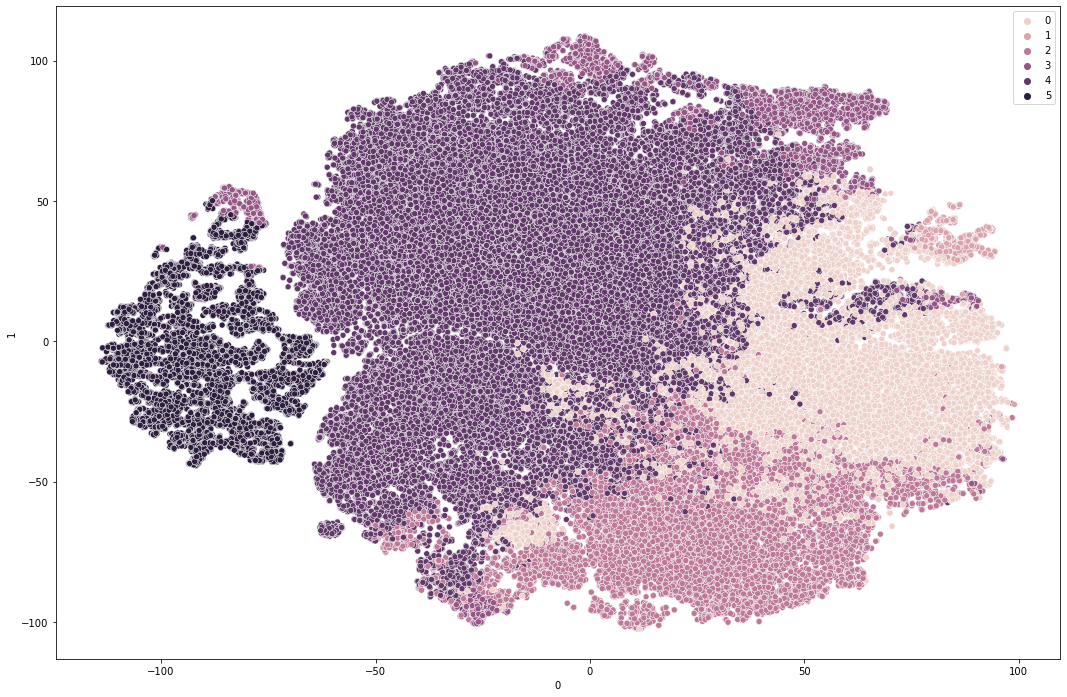

In [32]:
plt.figure(figsize=(18,12))
wtf = sns.scatterplot(data=pd.DataFrame(xReduced_v2), x=0, y=1, hue=cluster_predicted)#df.games_position)
